
# Project: Appointment Attendance Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
In this project I will be analyzing the dataset of "Appointment Attendence" that contains information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. We are interested in the characteristics of patients that show up to their appointment and conversely the ones who do not.
<br><br>
I have 4 questions I plan to explore and find answers for:<br>

> The __first question__ is "What the proportion of female pateints to male patients in the dataset, is the patient's gender a huge factor in attending the appointment?"
>

> The __second question__ is "Does older patients attend their appointments in comparison with younger patients?"
>

> The __third question__ is "Does having a Diabetes or Hipertension raises the possibility that the patient will attend his/her appointment?"
>


In [1]:
# importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

We will have an overlook over the data to see the areas of development and wrangling.

In [2]:
# Loading "No Show Appointments" Data

df=pd.read_csv('noshowappointments.csv')

# Exploring Data

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Inspecting Data types and Missing Values

Let's have an overall look over the columns, their datatypes, and non-null values.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


<li> Fortunately there is no missing values in this dataset! <br> <br>
<li> Coulmns PatientId, AppointmentID  do not add any value to the analysis, so we are going to inspect them before dropping.<br> <br>
<li> The columns' data types seems to be fine, except for "ScheduledDay" & "AppointmentDay" data types that are "str", It is better to convert them to the "datetime" data type.

__First of all__, we are going to check the uniquness of the columns' values (PatientId, AppointmentID)

In [4]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

We see that the number of unique values in PatientId is 62299 which is approximately half of the AppointmentID values, this means that the same patient may have one or more appointments. After this investigation We will keep the PatientID in order to check later on the patients with multiple records of appointmens. So this means that the AppointmentID is not useful in this analysis.<sup> 1 </sup>

In [5]:
# Dropping AppointmentID column
df.drop(['AppointmentID'], axis=1, inplace=True)

In [6]:
# Reseting index after dropping some columns
df.reset_index(drop=True,inplace=True)

**Second of all**, Converting both "ScheduledDay" & "AppointmentDay" to "Date" data type

In [7]:
# Converting datatypes
df['ScheduledDay'] = df['ScheduledDay'].astype('datetime64[ns]')
df['AppointmentDay'] = df['AppointmentDay'].astype('datetime64[ns]')

We will see if the change is done

In [8]:
# Checking
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   Gender          110527 non-null  object        
 2   ScheduledDay    110527 non-null  datetime64[ns]
 3   AppointmentDay  110527 non-null  datetime64[ns]
 4   Age             110527 non-null  int64         
 5   Neighbourhood   110527 non-null  object        
 6   Scholarship     110527 non-null  int64         
 7   Hipertension    110527 non-null  int64         
 8   Diabetes        110527 non-null  int64         
 9   Alcoholism      110527 non-null  int64         
 10  Handcap         110527 non-null  int64         
 11  SMS_received    110527 non-null  int64         
 12  No-show         110527 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(7), object(3)
memory usage: 11.0+ MB


Now the they are fixed!

After converting both "ScheduledDay" & "AppointmentDay", we are going to split them by (Year, Month, Day), and to ensure consistencey between the two columns, we are not going to use hours since it does not add any value because the AppointmentDay has no hour associated with it.<sup>1</sup>

In [9]:
# splitting by year, month, and day name

df['scheduled_year']= df['ScheduledDay'].dt.year
df['scheduled_month']= df['ScheduledDay'].dt.month
df['scheduled_day']= df['ScheduledDay'].dt.day_name()

df['appointment_year'] = df['AppointmentDay'].dt.year
df['appointment_month'] = df['AppointmentDay'].dt.month
df['appointment_day'] = df['AppointmentDay'].dt.day_name()

Now we are going to drop the two columns 

In [10]:
df.drop(['ScheduledDay','AppointmentDay'], axis=1 ,inplace=True)

Having a look after the changes of datatypes and splitting.

In [11]:
# Checking
df.head()

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,scheduled_year,scheduled_month,scheduled_day,appointment_year,appointment_month,appointment_day
0,2.987250e+13,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016,4,Friday,2016,4,Friday
1,5.589978e+14,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016,4,Friday,2016,4,Friday
2,4.262962e+12,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016,4,Friday,2016,4,Friday
3,8.679512e+11,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016,4,Friday,2016,4,Friday
4,8.841186e+12,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016,4,Friday,2016,4,Friday


In [12]:
# Reseting index after dropping some columns
df.reset_index(drop=True,inplace=True)

There are about 6603 duplicated rows in this dataset, so we are going to drop them

In [13]:
df.duplicated().sum()

6603

Dropping the duplicate rows

In [14]:
# drop duplicates
df.drop_duplicates(inplace=True)

Checking if the change is done.

In [15]:
# Checking
df.duplicated().sum()

0

because 'No Show' columns seems confusing, we are going to rename it to 'attended' and make __1__ represents true (The patient have attended the appointment) and __0__ for false (The patient did not attend the appointment). <sup>1</sup>

In [16]:
# Renaming
df.rename(columns = {'No-show':'attended'}, inplace=True)

In [17]:
# Converting 'No' to 1 & 'Yes' to 0
df['attended'] = df['attended'].replace(['No'],1)
df['attended'] = df['attended'].replace(['Yes'],0)

Having a look over the dataset after renaming the 'No Show' to 'attended' and replacing 'No' and 'Yes' with ones and zeros.

In [18]:
df.head()

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,attended,scheduled_year,scheduled_month,scheduled_day,appointment_year,appointment_month,appointment_day
0,2.987250e+13,F,62,JARDIM DA PENHA,0,1,0,0,0,0,1,2016,4,Friday,2016,4,Friday
1,5.589978e+14,M,56,JARDIM DA PENHA,0,0,0,0,0,0,1,2016,4,Friday,2016,4,Friday
2,4.262962e+12,F,62,MATA DA PRAIA,0,0,0,0,0,0,1,2016,4,Friday,2016,4,Friday
3,8.679512e+11,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,2016,4,Friday,2016,4,Friday
4,8.841186e+12,F,56,JARDIM DA PENHA,0,1,1,0,0,0,1,2016,4,Friday,2016,4,Friday


<a id='eda'></a>
## Exploratory Data Analysis


First of all, let's see the statistics of each numeric column in the dataset

In [19]:
# statistics of every column
df.describe()

,PatientId,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,attended,scheduled_year,scheduled_month,appointment_year,appointment_month
count,1.039240e+05,103924.000000,103924.000000,103924.000000,103924.000000,103924.000000,103924.000000,103924.000000,103924.000000,103924.000000,103924.000000,103924.0,103924.000000
mean,1.466787e+14,37.085861,0.098024,0.199069,0.072919,0.027145,0.021612,0.339286,0.793724,2015.999403,4.812373,2016.0,5.214955
std,2.549861e+14,23.179654,0.297348,0.399302,0.260004,0.162506,0.159549,0.473469,0.404633,0.024418,0.724389,0.0,0.478386
min,3.921784e+04,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,1.000000,2016.0,4.000000
25%,4.155112e+12,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2016.000000,4.000000,2016.0,5.000000
50%,3.154969e+13,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2016.000000,5.000000,2016.0,5.000000
75%,9.437323e+13,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2016.000000,5.000000,2016.0,5.000000
max,9.999816e+14,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,2016.000000,12.000000,2016.0,6.000000


From the statistics above we see that there the average patients' age is 37, and the minimum age is -1 ! which makes no sense, we will look for this row and drop it. we see that the maximum age is 115.<br>
<br>We also see that:
<li> About 20% of patients have a Hipertension
<li> About 7% of patients have Hiabetes
<li> About 3% have Alcoholism
<br>
<br>The average number of patients attending to their appointments is about 80%.<br>
<br>
Now we are going to see this in visuals, but before that let's drop the row/s with the ages less than or equal to 0.

In [20]:
# Searching
df[(df['Age']<=0)]

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,attended,scheduled_year,scheduled_month,scheduled_day,appointment_year,appointment_month,appointment_day
59,7.184428e+13,F,0,CONQUISTA,0,0,0,0,0,0,1,2016,4,Friday,2016,4,Friday
63,2.366233e+14,M,0,SÃO BENEDITO,0,0,0,0,0,0,1,2016,4,Wednesday,2016,4,Friday
64,1.885174e+14,M,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,1,2016,4,Monday,2016,4,Friday
65,2.718818e+14,M,0,CONQUISTA,0,0,0,0,0,0,1,2016,4,Wednesday,2016,4,Friday
67,8.647128e+13,F,0,NOVA PALESTINA,0,0,0,0,0,0,1,2016,4,Friday,2016,4,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110342,3.147163e+11,M,0,RESISTÊNCIA,0,0,0,0,0,0,1,2016,6,Monday,2016,6,Wednesday
110343,1.759439e+12,F,0,RESISTÊNCIA,0,0,0,0,0,1,1,2016,5,Thursday,2016,6,Wednesday
110345,1.473952e+14,F,0,RESISTÊNCIA,0,0,0,0,0,0,1,2016,5,Monday,2016,6,Wednesday
110346,5.577525e+12,M,0,RESISTÊNCIA,0,0,0,0,0,0,1,2016,6,Monday,2016,6,Wednesday


Dropping the rows of age less than or equal to 0

In [21]:
# Dropping
df.drop(df[df['Age']<=0].index,inplace = True)

We will check if the change is done

In [22]:
# Checking
df[(df['Age']<=0)].sum()

PatientId            0.0
Gender               0.0
Age                  0.0
Neighbourhood        0.0
Scholarship          0.0
Hipertension         0.0
Diabetes             0.0
Alcoholism           0.0
Handcap              0.0
SMS_received         0.0
attended             0.0
scheduled_year       0.0
scheduled_month      0.0
scheduled_day        0.0
appointment_year     0.0
appointment_month    0.0
appointment_day      0.0
dtype: float64

Great! Now we will move on to the visualization

Below we will see a visualization using histogram of every numeric column in the dataset

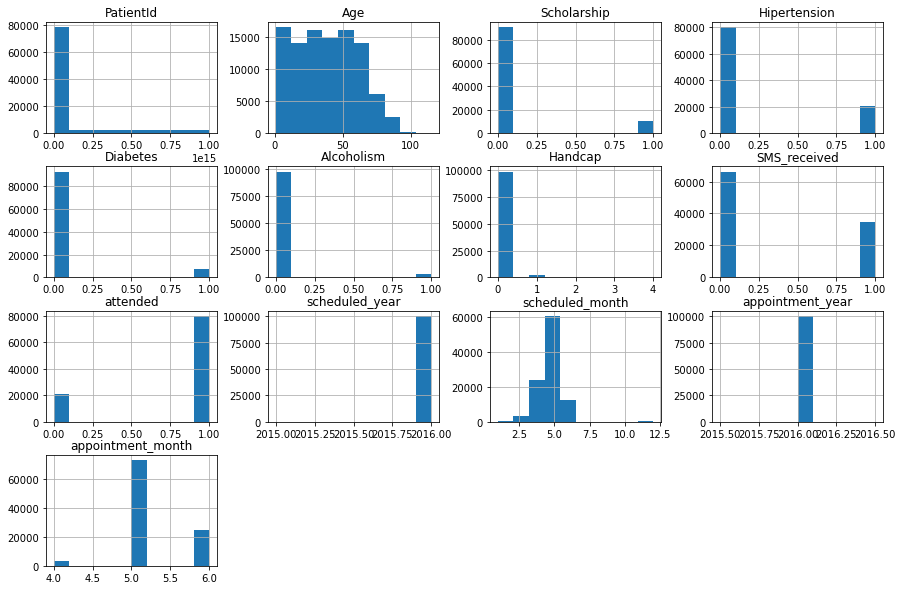

In [23]:
# Visualizing each column
df.hist(figsize=(15,10));

### What is the proportion of female pateints to male patients in the dataset, is the patient's gender a huge factor in attending the appointment? 

We can see that there are about 66564 female patients in this dataset and 33967 Male patients, which means the male proportion is approximately half of the females.

In [24]:
df['Gender'].value_counts()

F    66564
M    33967
Name: Gender, dtype: int64

Plotting the proportion of females vs males patients:

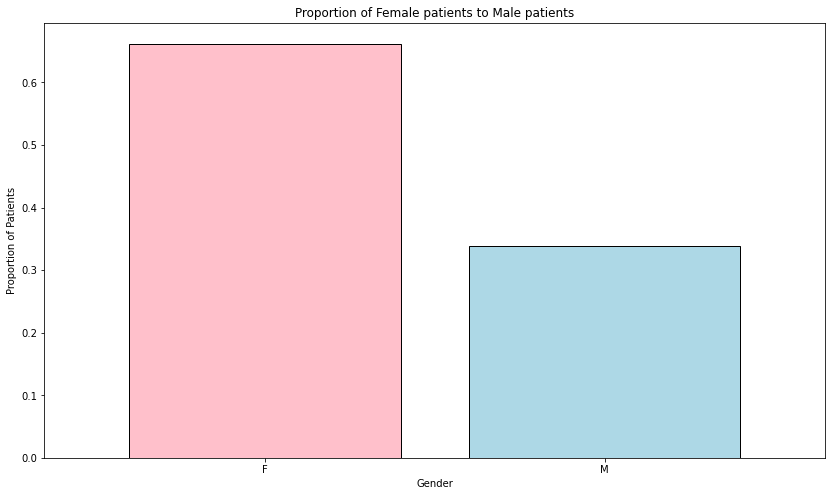

In [69]:
df['Gender'].value_counts(normalize=True).plot.bar(rot=0, width=0.8,color=['pink','lightblue'] ,edgecolor='black', figsize=[14,8])
plt.title("Proportion of Female patients to Male patients")
plt.xlabel("Gender")
plt.ylabel("Proportion of Patients");

From the above observations we see that the proportion of females in the dataset is higher than males.

For further visualizations of data using the mean, I will create a function that helps me create plots easily to avoid the repetitive code.

In [63]:
def plotAvgBarChart(df, xVar):
   
   # This function takes has two arguments, df for the dataframe, xVar for the column to be studied.
   # Simply by passing the two arguments, the function will create a bar chart showing the xVar and the 'attendend'
   # average in terms of the passed xVar.

    df.groupby(xVar).attended.mean().plot.bar(edgecolor='black',figsize=[14,8], rot=0, width=0.9);
    plt.title(f'Distribution of {xVar} Attendence'.title(), fontsize=12, weight='bold')
    plt.xlabel(xVar.title(), fontsize= 10, weight='bold')
    plt.ylabel('Frequency'.title(), fontsize= 10, weight='bold')

As more females are in this dataset, now we will see if the attendence has any relation with the gender of the patient, We will represent the results in Bar Chart.

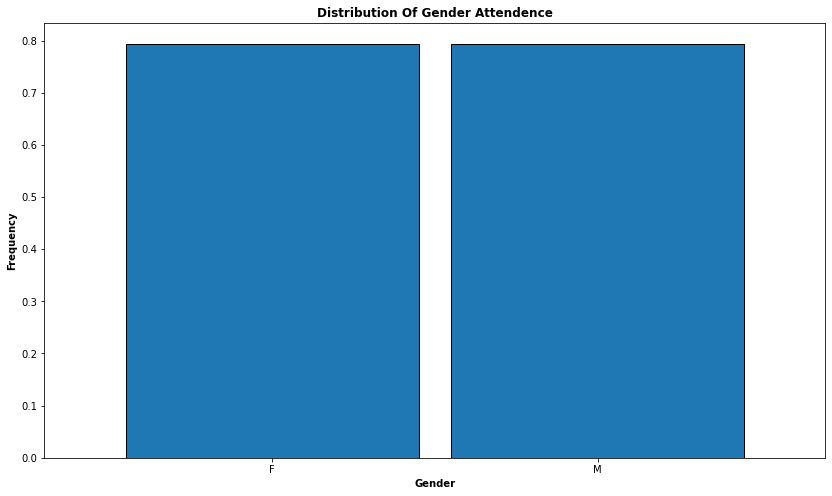

In [64]:
#plotting a bar chart
plotAvgBarChart(df, 'Gender')

So to answer our question, we can see that females proportion is higher than the males in this dataset but the gender is not a huge factor to predict if the patients will show up to their appointments, So let's go and explore another characteristics!

### Does older patients attend their appointments in comparison with younger patients?

First of all we are going to visualize the histogram of the age column to see the diversity of the patients' ages.

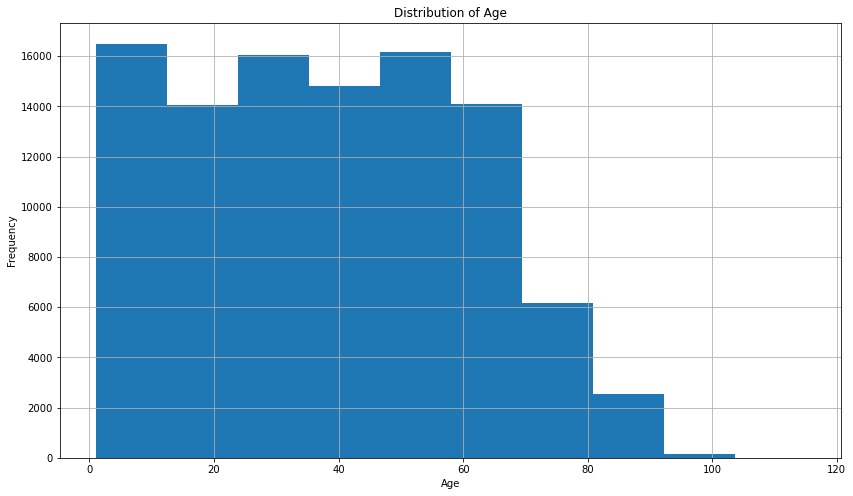

In [65]:
# Visualizing Age Column
df['Age'].plot.hist(grid=True, figsize=[14,8]);
plt.title('Distribution of Age');
plt.xlabel('Age');

I will classify the age groups based on the agreed definition which is:
<li> Pediatric group ( 0 – 14 )
<li> Young group ( 15 – 47 )
<li> Middle Age group ( 48 – 63 )
<li> Elderly group ( ≥ 64 )

In [60]:
# Creating new column called AgeGroup to classify the patients to age groups
df.loc[(df.Age < 15),  'Age Group'] = 'Pediatric'
df.loc[(df.Age >= 15)&(df.Age < 48),  'Age Group'] = 'Young'
df.loc[(df.Age >= 48)&(df.Age < 64),  'Age Group'] = 'Middle Age'
df.loc[(df.Age >= 64),  'Age Group'] = 'Elderly'

So after doing the classification above, we will visualize the age groups to see if the age has any relation with attending the appointment

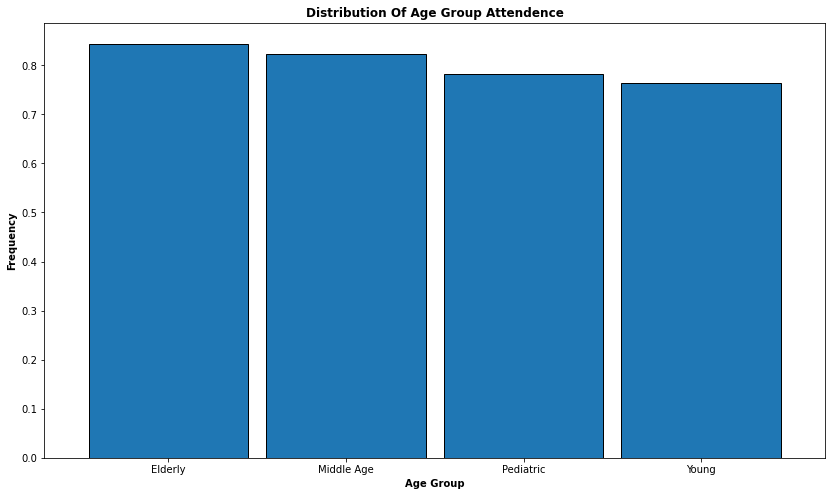

In [66]:
# Visualizing
plotAvgBarChart(df,'Age Group')

So to answer our question, from the above observations we can say that the middle aged and elderly patients have a an an average between 84% ~ 82% showing up to their appointments in comparison with younger patients which have 76%.

### Does having a Diabetes or Hipertension raises the possibility that the patients will attend the appointment?

To see if having chronic diseases have any relation with attending to the appointment, we will have two visualizations one for the Diabetes and the other for Hipertension.

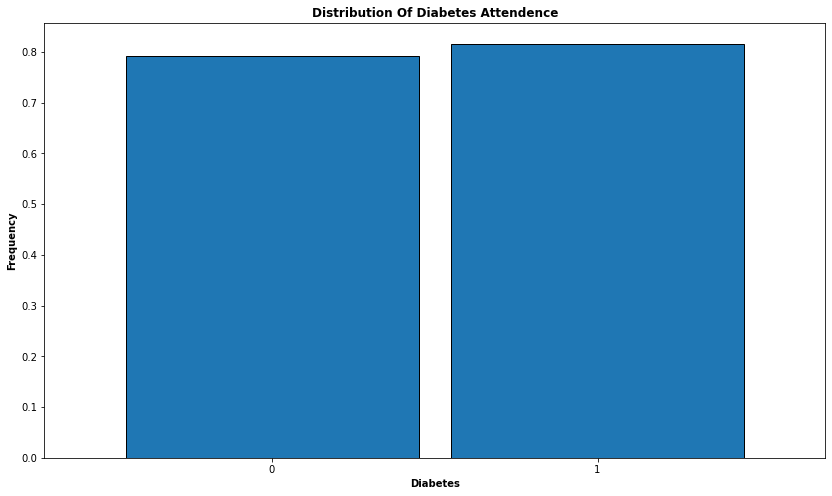

In [67]:
# Visualizing Diabetes
plotAvgBarChart(df,'Diabetes')

From the above bar chart we can see that having Diabetes raises the possibility of attending the appointment.

Now we will see the visualization of the Hipertension.

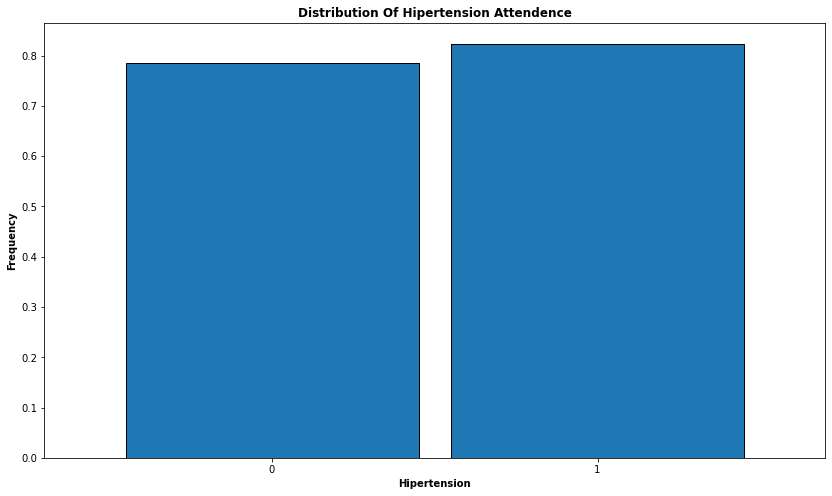

In [68]:
# Visualizing Hipertension
plotAvgBarChart(df,'Hipertension')

The above distribution of hipertension shows that the patients with hipertension have a high possibility of showing up to their appointment.

So to answer our question, it is indeed that having a chronic diseases raises the possibility of showing up to the appointment.

<a id='conclusions'></a>
## Conclusions

In Conclusion, we have explored 4 characteristics of patients and their association with showing up to the appointment. The characteristics are the Gender, Age Group, Hipertension, and Diabetes. Our findings are below:
<br> <br>
<li> The females proportion is higher than the males in this dataset but the gender is not a huge factor to predict if the patients will show up to their appointments.
<br><br>
    
<li> The middle aged and elderly patients have a an an average between 84% ~ 82% showing up to their appointments in comparison with younger patients which have 76%.
<br><br>

<li> Having a Chronic Diseases such as Diabetes or Hipertension raise the the possibility of showing up to the appointment.


One of the limitations in this data analysis is that the sample is small, which can not lead to further explanations and observation to be generalized over lets say the population of Brazil in this case.

Another limitation is what if the data was collected from another country lets say for example the developing countries such as (Cambodia, Rwanda, Zimbabwe, ...etc ). Will the results be the same? of course not.

#### References

[1] : https://www.kaggle.com/mahmoud0shabana/medical-appointment-no-shows-dataset